# Bend Radius Study:

Nufern fiber, fundamental mode, bend radius now varies.  Our original bend radius was 4000 * R_core

In [1]:
import numpy as np
import ngsolve as ng
import os
import matplotlib.pyplot as plt
import cmasher as cmr

from IPython.display import Video
from celluloid import Camera
from fiberamp import FiberMode

np.set_printoptions(suppress=True)

importing NGSolve-6.2.2203-56-g47f483033


In [2]:
main = os.path.expanduser('~/local/convergence/bending/bending_radius_study')
studyname = 'scalar_modes'

path = main + '/' + studyname + '/outputs'

if not os.path.isdir(os.path.relpath(path)):
    print('Making directory: ' + path)
    os.makedirs(os.path.relpath(path))


In [3]:
ref = 2
p = 3

a = FiberMode(fibername='Nufern_Yb', R=8, Rout=10, h=80, refine=ref,
              curveorder=max(p, 3))

ModeSolver: Checking if mesh has required regions
Mesh has  3104  elements,  1585  points,  and  4688  edges.


In [4]:
# Center, radius and span
center = 11468.5009866+4.85458815e-05j
radius = .2
nspan = 4
npts = 4

# Array of bend radii
N = 1
R_bends = np.linspace(4000,4000,N)
CLs = np.zeros(N)


In [5]:

for i, R in enumerate(R_bends):
    
    Nusqrs, Modes, _, _, CL = a.bentscalarmodes(rad=radius, ctr=center, R_bend=R,
                                    alpha=3, p=p, nspan=nspan,
                                    npts=npts, niterations=12)
    
    center = Nusqrs[0]
    CLs[i] = CL[0]

Set NGSolve automatic PML with p= 3  alpha= 3 and thickness=2.000

SpectralProj: Setting shifted trapezoidal rule quadrature on circular contour
SpectralProj: Radius=0.2, Center=11468.5+4.85459e-05j

SpectralProjNG: Computing resolvents along the contour using
                inverse type umfpack
SpectralProjNG:   Factorizing at z = +11468.642 +0.141j
SpectralProjNG:   Factorizing at z = +11468.360 +0.141j
SpectralProjNG:   Factorizing at z = +11468.360 -0.141j
SpectralProjNG:   Factorizing at z = +11468.642 -0.141j
Using FEAST to search for scalar bent modes in
circle of radius 0.2 centered at  (11468.5009866+4.85458815e-05j)
assuming not more than 4 modes in this interval.
System size: 14065  x  14065
  Inverse type: umfpack

=========== Starting FEAST iterations ===========
Trying with 4 vectors:

 ITERATION 1 with 4 vectors and 4 left vectors
   During kernel cleaning abs(g):
   [28531.3     0.      0.      0. ]
   Real part of computed eigenvalues:
   [11466.324923   11468.3163501

(0.0, 0.008166346833706158)

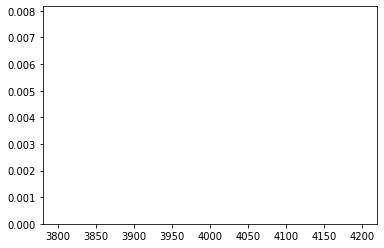

In [6]:
plt.plot(R_bends[:], CLs[:])
plt.ylim(0.000)

In [7]:
np.save(os.path.relpath(path + 'CLs'), CLs)

In [ ]:
np.save(os.path.relpath(path + 'alphas'), alphas)

# Observations

Initially we had R=3, Rout=5.  We got a fairly strong curvature, peaking at about alpha=1 CL=1.01.  Moving out the starting of PML to R=4 and Rout=6 gave a much flatter line, hovering near .008 for most all of the alpha values tested.  This persisted for R=5,6, Rout=7,8.

As we moved it further out to R=7, Rout=9 the loss started to increase as we increased alpha. But then it went back to normal.

# Visualization

Makin a movie yo!

In [8]:
N, M = 100, 100
rs = np.linspace(0, 3, N)
thetas = np.linspace(0, 2*np.pi, M)

Rs, Thetas = np.meshgrid(rs, thetas)
X, Y = Rs * np.cos(Thetas), Rs * np.sin(Thetas)


In [9]:
# Center, radius and span
center = 11467.78876477
radius = .2
nspan = 4
npts = 4

# Array of bend radii
N_R = 40
R_bends = np.linspace(8000, 4000, N_R)
CLs = np.zeros(N_R)
Z = np.zeros((N_R, X.shape[0], X.shape[1]), dtype=complex)


for k, R in enumerate(R_bends):
    
    Nusqrs, Modes, _, _, CL = a.bentscalarmodes(rad=radius, ctr=center, R_bend=R,
                                    alpha=3, p=p, nspan=nspan,
                                    npts=npts, niterations=12)
    y = ng.Norm(Modes[0])
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[k,i,j]=y(a.mesh(X[i, j], Y[i, j]))
            
    center = Nusqrs[0]
    CLs[k] = CL[0]

Set NGSolve automatic PML with p= 3  alpha= 3 and thickness=2.000

SpectralProj: Setting shifted trapezoidal rule quadrature on circular contour
SpectralProj: Radius=0.2, Center=11467.8+0j

SpectralProjNG: Computing resolvents along the contour using
                inverse type umfpack
SpectralProjNG:   Factorizing at z = +11467.930 +0.141j
SpectralProjNG:   Factorizing at z = +11467.647 +0.141j
SpectralProjNG:   Factorizing at z = +11467.647 -0.141j
SpectralProjNG:   Factorizing at z = +11467.930 -0.141j
Using FEAST to search for scalar bent modes in
circle of radius 0.2 centered at  11467.78876477
assuming not more than 4 modes in this interval.
System size: 14065  x  14065
  Inverse type: umfpack

=========== Starting FEAST iterations ===========
Trying with 4 vectors:

 ITERATION 1 with 4 vectors and 4 left vectors
   During kernel cleaning abs(g):
   [58178.4     0.      0.      0. ]
   Real part of computed eigenvalues:
   [11467.78876502 11467.85936702 11468.02125879 11468.0949

   During kernel cleaning abs(g):
   [0. 0. 0. 0.]
   Real part of computed eigenvalues:
   [11467.27219706 11467.80886258 11468.0822295  11468.95823576]
   Imag part of computed eigenvalues:
   [2.97633637 0.         2.095687   2.21138366]
   Relative Hausdorff distance from prior iterate: 6.354e-05

 ITERATION 3 with 4 vectors and 4 left vectors
   During kernel cleaning abs(g):
   [47163.5     0.      0.      0. ]
   Real part of computed eigenvalues:
   [11466.16092848 11467.50625412 11467.80886258 11468.50918718]
   Imag part of computed eigenvalues:
   [2.93055932 2.39276222 0.         2.39930153]
   Relative Hausdorff distance from prior iterate: 9.698e-05

   Removing ew#[1, 2, 3] not enclosed by contour
 ITERATION 4 with 1 vectors and 1 left vectors
   During kernel cleaning abs(g):
   [0.]
   Real part of computed eigenvalues:
   [11467.80886258]
   Relative Hausdorff distance from prior iterate: 5.870e-15


***FEAST converged with:
	Relative Hausdorff distance = 5.870e-15

=

SpectralProjNG:   Factorizing at z = +11467.690 +0.141j
SpectralProjNG:   Factorizing at z = +11467.690 -0.141j
SpectralProjNG:   Factorizing at z = +11467.973 -0.141j
Using FEAST to search for scalar bent modes in
circle of radius 0.2 centered at  (11467.831469045736+2.1247879984215714e-10j)
assuming not more than 4 modes in this interval.
System size: 14065  x  14065
  Inverse type: umfpack

=========== Starting FEAST iterations ===========
Trying with 4 vectors:

 ITERATION 1 with 4 vectors and 4 left vectors
   During kernel cleaning abs(g):
   [52842.6     0.      0.      0. ]
   Real part of computed eigenvalues:
   [11467.17741801 11467.83963479 11468.30000144 11468.92333191]
   Imag part of computed eigenvalues:
   [ 2.27307425 -0.00000048  2.69431081  1.23376291]
   Relative Hausdorff distance from prior iterate: 8.720e+95

 ITERATION 2 with 4 vectors and 4 left vectors
   During kernel cleaning abs(g):
   [0. 0. 0. 0.]
   Real part of computed eigenvalues:
   [11465.79631648 

   During kernel cleaning abs(g):
   [30767.7     0.      0.      0. ]
   Real part of computed eigenvalues:
   [11466.61662748 11467.72007449 11467.86627646 11468.3970209 ]
   Imag part of computed eigenvalues:
   [2.17301696 2.18948487 0.00000003 4.12150585]
   Relative Hausdorff distance from prior iterate: 1.794e-04

   Removing ew#[1, 2, 3] not enclosed by contour
 ITERATION 4 with 1 vectors and 1 left vectors
   During kernel cleaning abs(g):
   [0.]
   Real part of computed eigenvalues:
   [11467.86627647]
   Imag part of computed eigenvalues:
   [0.]
   Relative Hausdorff distance from prior iterate: 2.770e-12


***FEAST converged with:
	Relative Hausdorff distance = 2.770e-12

============= FEAST iterations done =============
Results:
 Nu²: [11467.86627647+0.j]
 Nus: [746871.01784041+0.00000003j]
 CL dB/m: [0.00000029]
Set NGSolve automatic PML with p= 3  alpha= 3 and thickness=2.000

SpectralProj: Setting shifted trapezoidal rule quadrature on circular contour
SpectralProj: R


SpectralProj: Setting shifted trapezoidal rule quadrature on circular contour
SpectralProj: Radius=0.2, Center=11467.9+3.03855e-09j

SpectralProjNG: Computing resolvents along the contour using
                inverse type umfpack
SpectralProjNG:   Factorizing at z = +11468.038 +0.141j
SpectralProjNG:   Factorizing at z = +11467.755 +0.141j
SpectralProjNG:   Factorizing at z = +11467.755 -0.141j
SpectralProjNG:   Factorizing at z = +11468.038 -0.141j
Using FEAST to search for scalar bent modes in
circle of radius 0.2 centered at  (11467.8965949056+3.0385516266446147e-09j)
assuming not more than 4 modes in this interval.
System size: 14065  x  14065
  Inverse type: umfpack

=========== Starting FEAST iterations ===========
Trying with 4 vectors:

 ITERATION 1 with 4 vectors and 4 left vectors
   During kernel cleaning abs(g):
   [47500.5     0.      0.      0. ]
   Real part of computed eigenvalues:
   [11465.27162785 11467.60740288 11467.90763579 11468.10023787]
   Imag part of comput

   During kernel cleaning abs(g):
   [0. 0. 0. 0.]
   Real part of computed eigenvalues:
   [11466.65648705 11467.93127392 11467.94398121 11468.44399518]
   Imag part of computed eigenvalues:
   [1.48063186 2.38170086 0.00000001 1.4075921 ]
   Relative Hausdorff distance from prior iterate: 1.147e-04

 ITERATION 3 with 4 vectors and 4 left vectors
   During kernel cleaning abs(g):
   [9459.5    0.     0.     0. ]
   Real part of computed eigenvalues:
   [11466.55681193 11467.80410904 11467.94398113 11468.77006177]
   Imag part of computed eigenvalues:
   [1.93348952 2.44107095 0.00000025 2.2981646 ]
   Relative Hausdorff distance from prior iterate: 8.270e-05

   Removing ew#[1, 2, 3] not enclosed by contour
 ITERATION 4 with 1 vectors and 1 left vectors
   During kernel cleaning abs(g):
   [0.]
   Real part of computed eigenvalues:
   [11467.94398121]
   Imag part of computed eigenvalues:
   [0.00000001]
   Relative Hausdorff distance from prior iterate: 2.158e-11


***FEAST converged

SpectralProjNG:   Factorizing at z = +11467.845 +0.141j
SpectralProjNG:   Factorizing at z = +11467.845 -0.141j
SpectralProjNG:   Factorizing at z = +11468.127 -0.141j
Using FEAST to search for scalar bent modes in
circle of radius 0.2 centered at  (11467.985932267233+4.3611006104162296e-08j)
assuming not more than 4 modes in this interval.
System size: 14065  x  14065
  Inverse type: umfpack

=========== Starting FEAST iterations ===========
Trying with 4 vectors:

 ITERATION 1 with 4 vectors and 4 left vectors
   During kernel cleaning abs(g):
   [42157.6     0.      0.      0. ]
   Real part of computed eigenvalues:
   [11466.34989989 11467.91564281 11468.00136097 11468.52615665]
   Imag part of computed eigenvalues:
   [ 3.27141435  1.88216279 -0.00000031  2.6485267 ]
   Relative Hausdorff distance from prior iterate: 8.720e+95

 ITERATION 2 with 4 vectors and 4 left vectors
   During kernel cleaning abs(g):
   [0. 0. 0. 0.]
   Real part of computed eigenvalues:
   [11456.06321661 

KeyboardInterrupt: 

In [ ]:
cmap = cmr.get_sub_cmap('jet', 0.2, 0.89)

fig = plt.figure(figsize=(8,8))
camera = Camera(fig)
plt.box()
for q in range(N_R):
    plt.plot(np.cos(thetas), np.sin(thetas), 'b--', linewidth=1.6)
    plt.contourf(X, Y, Z[q].real, levels=60, cmap=cmap)
    plt.axis('square')
    plt.box()
    plt.xticks([])
    plt.yticks([])
    camera.snap()


In [ ]:
animation = camera.animate(interval=38.25)



In [ ]:
animation.save('mode_animation.mp4')

In [10]:
Video('mode_animation.mp4')

In [ ]:
fig, ax = plt.subplots(figsize=(10.5,8))
ax.set_title('Confinement Loss vs Curvature\n Fundamental Mode Nufern fiber\n', name="Serif", fontsize=22)
ax.plot(1/R_bends[:], CLs[:])
# ax.set_yscale('log')
ax.set_xlabel('\nCurvature', fontsize=16)
ax.set_ylabel('Loss\n', fontsize=16)

ax.grid()


In [ ]:
np.log(CLs)

# Save if you like


In [ ]:
np.save(os.path.relpath(path + '/CLs'), CLs)

np.save(os.path.relpath(path + '/R_bends'), R_bends)

np.save(os.path.relpath(path + '/Zs'), Z)

# Load if you need

In [ ]:
CLs = np.load(os.path.relpath(path + '/CLs.npy'))

R_bends = np.load(os.path.relpath(path + '/R_bends.npy'))

Z = np.load(os.path.relpath(path + '/Zs.npy'))